In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def create_board(board_size):
    N = board_size
    M = board_size*2-1
    G = np.zeros([N,M])
    ball_positions = np.array([[i,x] for i in range(N) for x in range(i,M-i+1,2)]).T
    G[ball_positions[0],ball_positions[1]]=1
    return G

def position_valid(G, position):
    N,M = G.shape
    i,j = position
    return (i >= 0 and i < N and j >= i and j < M-i and (i+j)%2==0)

def jump_positions(Jump):
    ball_position,jump_vector = Jump
    target = ball_position+jump_vector
    landing = ball_position+jump_vector*2
    return target, landing

def execute_jump(G,Jump):
    target, landing = jump_positions(Jump)
    ball_position = Jump[0]
    G_prime=G.copy()
    for position in [ball_position, target, landing]:
        G_prime[position[0], position[1]] = 1-G_prime[position[0], position[1]]
    return G_prime

def valid_jumps(G):
    diagonal_jump_vectors = [[i,j] for i in [1,-1] for j in [1,-1]]
    horizontal_jump_vectors = [[0,j] for j in [2,-2]]
    all_jump_vectors = np.array(diagonal_jump_vectors+horizontal_jump_vectors)
    remaining_ball_positions = np.array(np.where(G)).T
    all_jumps = [[ball_position,jump_vector] \
             for ball_position in remaining_ball_positions \
             for jump_vector in all_jump_vectors]
    for Jump in all_jumps:
        target, landing = jump_positions(Jump)
        if position_valid(G,target) and position_valid(G,landing) \
        and G[target[0],target[1]] and not G[landing[0],landing[1]]:
                yield Jump

def solve_recursive(G, solution=(), end_position=None):  
    if np.sum(G)==1:
            if end_position:
                if G[end_position[0], end_position[1]]:
                    yield solution
            else:
                yield solution
    else:
        for Jump in valid_jumps(G):
            G_prime = execute_jump(G,Jump)
            yield from solve_recursive(G_prime, solution+(Jump,), end_position)
            
def visualize_board(G,Jump=None):
    x_scale=2e2
    y_scale=4e1
    size=250
    x,y = np.where(G)
    N,M = G.shape
    ball_positions = np.array([[i,x] for i in range(N) for x in range(i,M-i+1,2)]).T
    plt.scatter(ball_positions[1]/x_scale,ball_positions[0]/y_scale,
                s=size,color='grey',alpha=0.3)
    plt.scatter(y/x_scale,x/y_scale,s=size,alpha=0.7)
    if Jump:
        target, landing = jump_positions(Jump)
        plt.scatter(target[1]/x_scale,target[0]/y_scale,s=size)
        plt.scatter(Jump[0][1]/x_scale,Jump[0][0]/y_scale,s=size)
        plt.arrow(Jump[0][1]/x_scale,Jump[0][0]/y_scale,
                  Jump[1][1]*2/x_scale,Jump[1][0]*2/y_scale,alpha=0.5)
        plt.title(f'{Jump[0]} jump {Jump[0]+Jump[1]}')
    plt.axis('off')
    plt.show()

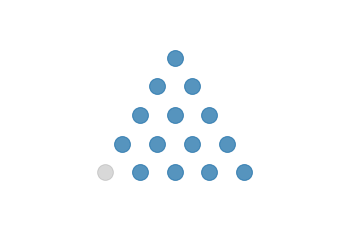

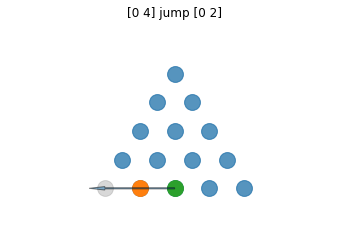

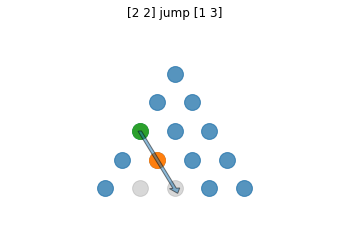

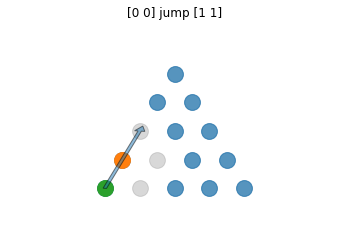

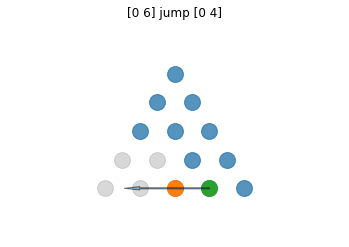

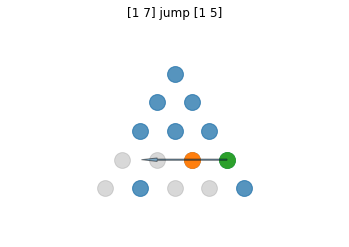

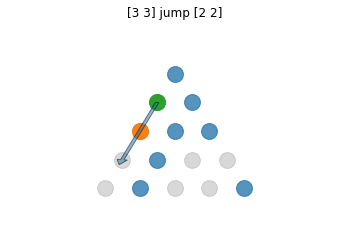

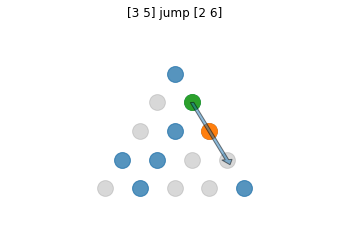

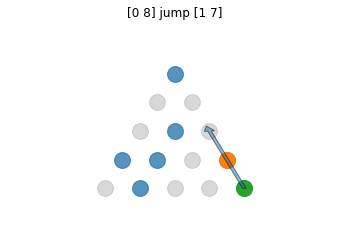

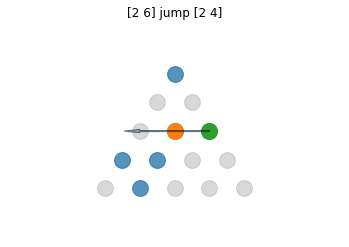

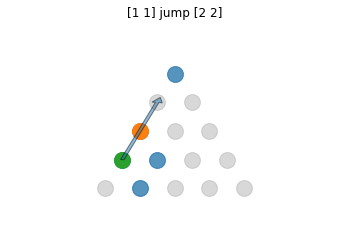

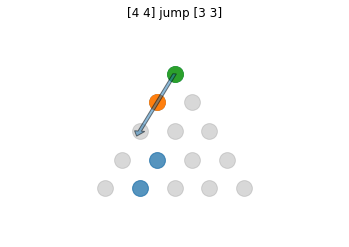

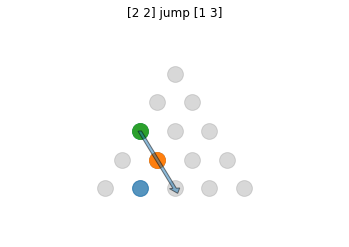

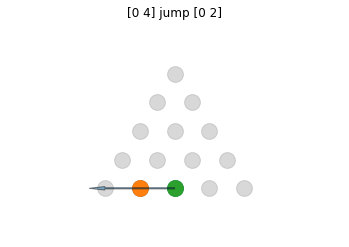

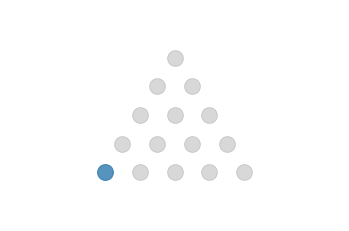

BOARD_SIZE = 5 
EMPTY_CELL = [0, 0] 
END_POSITION = [0, 0] 

CPU times: user 6.24 s, sys: 375 ms, total: 6.62 s
Wall time: 4.46 s


In [3]:
%%time

BOARD_SIZE = 5
EMPTY_CELL = [0,0]
END_POSITION = [0,0]

G = create_board(BOARD_SIZE)
G[EMPTY_CELL[0],EMPTY_CELL[1]] = 0

visualize_board(G)
try:
    solution = next(solve_recursive(G,end_position=END_POSITION))
    G_prime=G.copy()
    for Jump in solution:
        visualize_board(G_prime,Jump)
        G_prime = execute_jump(G_prime,Jump)
    visualize_board(G_prime)
except StopIteration:
    print('No solution')
    
print( f'BOARD_SIZE = {BOARD_SIZE} \n'
    f'EMPTY_CELL = {EMPTY_CELL} \n'
    f'END_POSITION = {END_POSITION} \n')

In [4]:
'''
BOARD_SIZE = 5
EMPTY_CELL = [[2],[6]]
solutions - 85258
6min 40s
'''
'''
BOARD_SIZE = 5
EMPTY_CELL = [[0],[0]]
solutions - 29760
3min 25s
'''

'\nBOARD_SIZE = 5\nEMPTY_CELL = [[0],[0]]\nsolutions - 29760\n3min 25s\n'